In [9]:
import warnings
warnings.filterwarnings(action="ignore")

import matplotlib as mol
mol.rcParams['axes.unicode_minus'] = False

## 실습예제1 - 완전연결(complete linkage)을 이용한 계층적 클러스터링

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(111)
var = ['X', 'Y']
labels = ['점0', '점1', '점2', '점3', '점4']
X = np.random.random_sample([5, 2]) * 10
df = pd.DataFrame(X, columns=var, index=labels)
df

,X,Y
점0,6.121702,1.690698
점1,4.360590,7.692625
점2,2.953253,1.491630
점3,0.224783,4.202245
점4,2.386821,3.376562


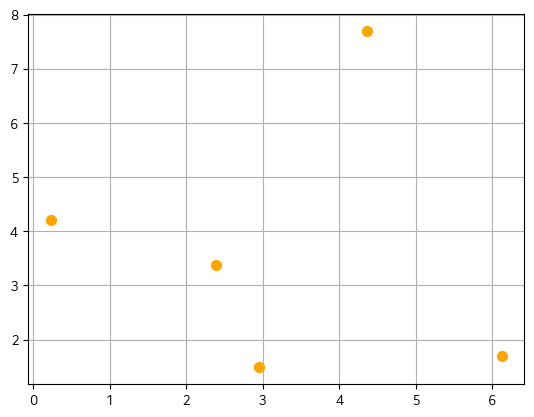

In [19]:
plt.rcParams['font.family'] = 'LG SMART UI'
plt.scatter(X[:, 0], X[:, 1], c='orange', marker='o', s=50)
plt.grid(True)
plt.show()

In [20]:
from scipy.spatial.distance import pdist, squareform

distmatrix = pdist(df, metric='euclidean')   # 두 점 사이의 거리 계산
distmatrix

# 총 거리 개수를 알기위한 계산식: n * (n-1) / 2
# n=데이터개수

array([6.25496953, 3.1746961 , 6.40948658, 4.09773961, 6.35869002,
       5.41180656, 4.74596264, 3.84603471, 1.96820089, 2.31433823])

In [21]:
row_dist = pd.DataFrame(squareform(distmatrix), columns=labels, index=labels)
row_dist

# 두 점 사이의 거리를 계산한 1차원 데이터 distmatrix를 가지고  squareform 함수를 사용하여 2차원 데이터로 만들어줌

,점0,점1,점2,점3,점4
점0,0.000000,6.254970,3.174696,6.409487,4.097740
점1,6.254970,0.000000,6.358690,5.411807,4.745963
점2,3.174696,6.358690,0.000000,3.846035,1.968201
점3,6.409487,5.411807,3.846035,0.000000,2.314338
점4,4.097740,4.745963,1.968201,2.314338,0.000000


---
#### squareform(): 대각선 값을 0으로 하는 데이터를 만들어줌

In [22]:
full = squareform(np.arange(1, 11))
full

array([[ 0,  1,  2,  3,  4],
       [ 1,  0,  5,  6,  7],
       [ 2,  5,  0,  8,  9],
       [ 3,  6,  8,  0, 10],
       [ 4,  7,  9, 10,  0]])

---

In [4]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(distmatrix, method='complete')
row_clusters

array([[2.        , 4.        , 1.96820089, 2.        ],
       [3.        , 5.        , 3.84603471, 3.        ],
       [0.        , 1.        , 6.25496953, 2.        ],
       [6.        , 7.        , 6.40948658, 5.        ]])

In [5]:
pd.DataFrame(row_clusters, columns=['클러스터ID_1', '클러스터ID_2', '거리', '클러스터 멤버수'],
            index=['클러스터 %d' % (i+1) for i in range(row_clusters.shape[0])])

,클러스터ID_1,클러스터ID_2,거리,클러스터 멤버수
클러스터 1,2.0,4.0,1.968201,2.0
클러스터 2,3.0,5.0,3.846035,3.0
클러스터 3,0.0,1.0,6.254970,2.0
클러스터 4,6.0,7.0,6.409487,5.0


=> 클러스터 2, 4의 점 5, 6, 7번
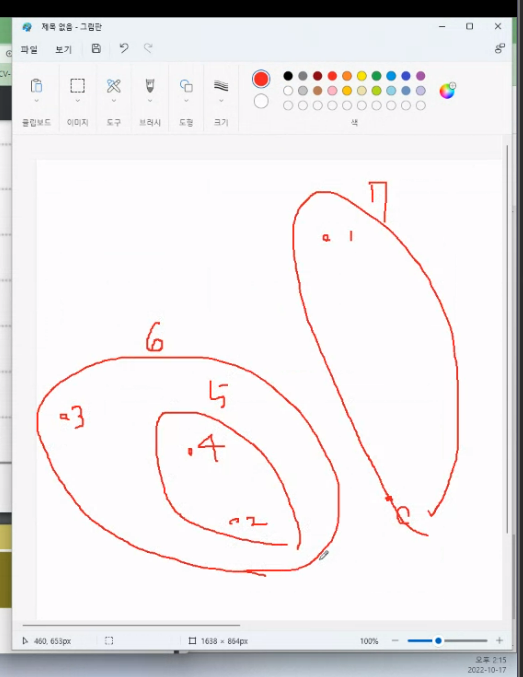

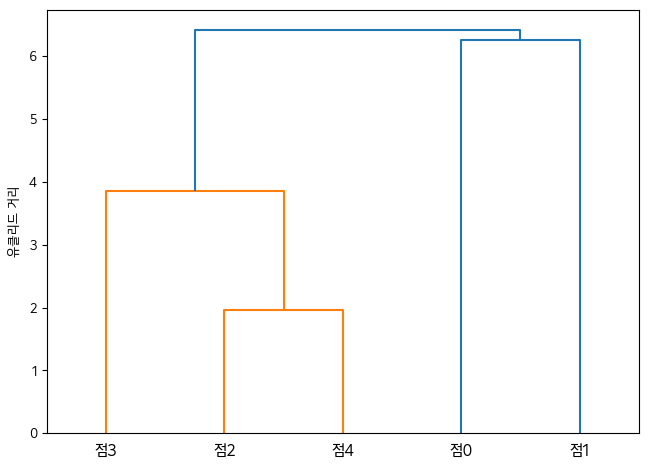

In [23]:
from scipy.cluster.hierarchy import dendrogram

row_dendrogram = dendrogram(row_clusters, labels=labels)
plt.rcParams['font.family'] = 'LG SMART UI'
plt.tight_layout()
plt.ylabel("유클리드 거리")
plt.show()

# dendrogram(): 클러스터의 계층 구조를 표현

In [7]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print("클러스터 분류 결과:", labels)

# AgglomerativeClustering()
# n_clusters: 최종 클러스터 개수

# 분류결과를 순서로 보면 점0,1,2,3,4

클러스터 분류 결과: [0 0 1 1 1]


## 실습예제2 - iris데이터를 활용한 계층적 클러스터링

In [24]:
import statsmodels.api as sm

iris = sm.datasets.get_rdataset("iris", package="datasets")
iris_df = iris.data
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


##### - 데이터 인코딩 작업

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(iris_df.Species)
iris_df.Species = le.transform(iris_df.Species)
iris_df.Species

# 변환된 0~ 순서는 알파벳 순

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

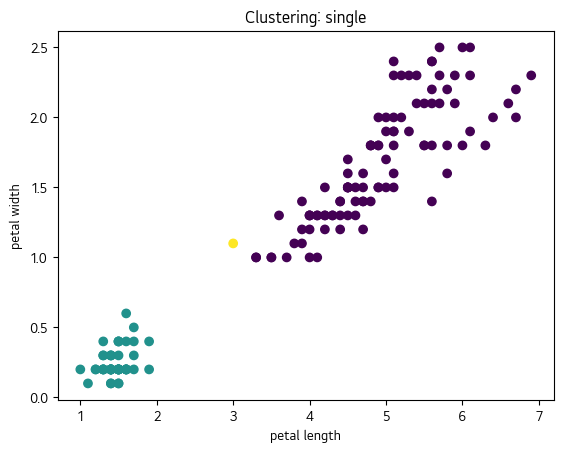

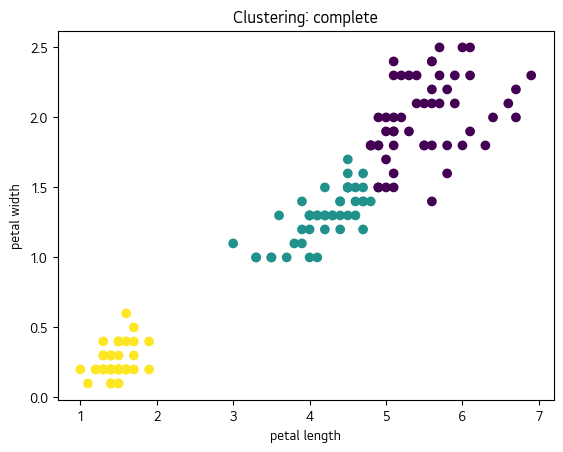

In [41]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

linkage = ['single', 'complete']   # linkage의 종류로는 이 외에도 average, ward까지 총 4가지가 있음
for idx, i in enumerate(linkage):
    plt.figure(idx)
    hier = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage=i)
    hier.fit(iris_df.iloc[:, 2:4])
    
    plt.scatter(iris_df.iloc[:, 2], iris_df.iloc[:, 3], c=hier.labels_)
    plt.title("Clustering: "+i)
    plt.xlabel("petal length")
    plt.ylabel("petal width")
    
plt.show()

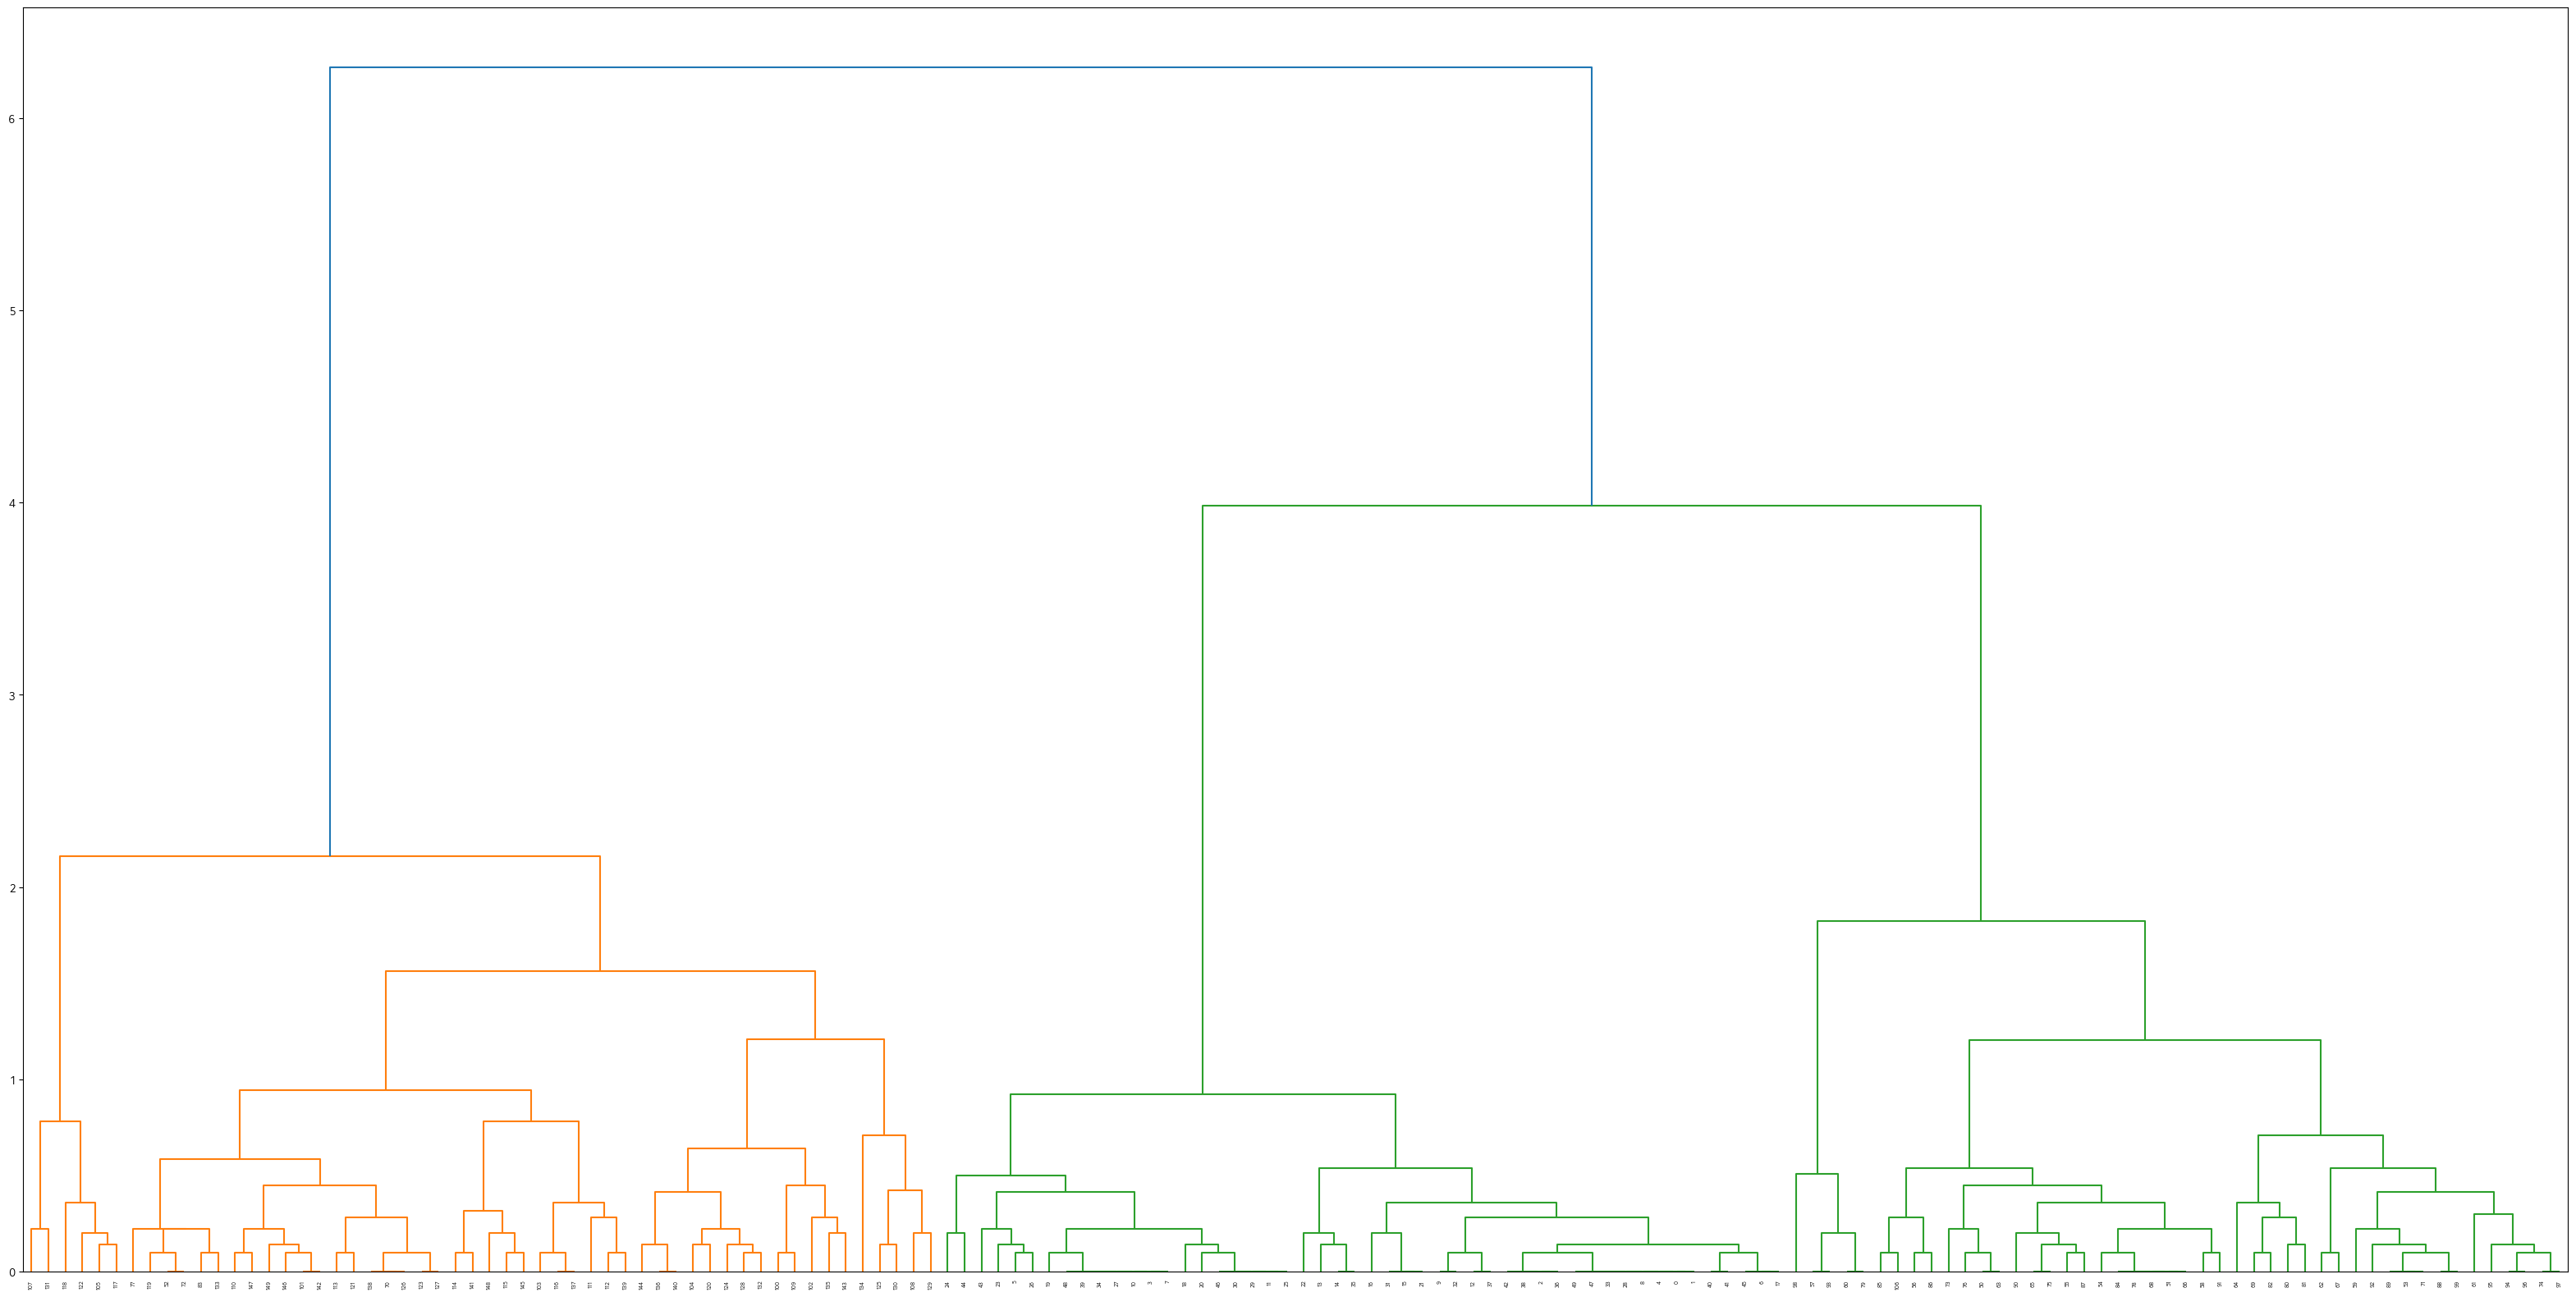

In [44]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

clustering = linkage(iris_df.iloc[:, 2:4], method="complete")

plt.figure(figsize=(40, 20))
dendrogram(clustering)
plt.show()

In [42]:
from scipy.cluster.hierarchy import fcluster

predict = fcluster(clustering, 3, criterion="distance")
predict

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

##### - 재미삼아 iris데이터와 정답 비교해보기

In [45]:
import numpy as np

adjusted_pred = np.choose((predict-1), [2, 0, 1]).astype(np.int64)
adjusted_pred

# np.choose(): 데이터 선택
# predict가 2일때 predict-1=1 => 2자리에 인덱스 1의 값인 0을 넣어라
# predict가 3일때 =2 => 3자리에 index 2값인 1을 넣어라
# predict가 1일때 = 0 => 1자리에 index 0의 값인 2를 넣어라

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [51]:
pred_name = le.inverse_transform(adjusted_pred)
origin_name = le.inverse_transform(iris_df.Species)
origin_name

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'virginica' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versic

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [50]:
ct = pd.crosstab(origin_name, pred_name, rownames=['True'], colnames=['Predicted'], margins=True)
ct

Predicted,setosa,versicolor,virginica,All
True,,,,
setosa,50,0,0,50
versicolor,0,45,5,50
virginica,0,1,49,50
All,50,46,54,150


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

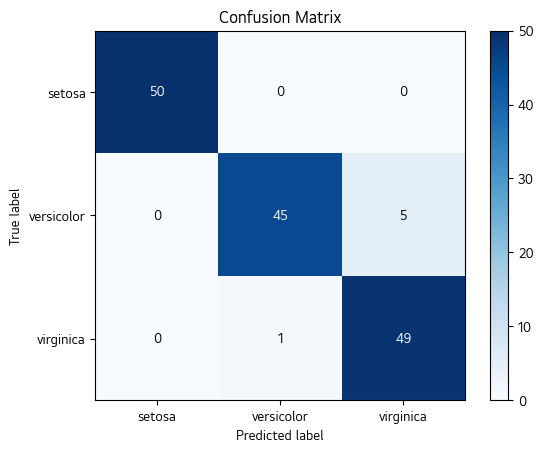

In [49]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(origin_name, pred_name)